<a href="https://colab.research.google.com/github/HeetvDhandhukia/OIBSIP/blob/main/Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Unemployment in India1.csv')

In [ ]:
data.head(5)

,Region,date,Frequency,Estimated_Unemployment_Rate,Estimated Employed,Estimated_Labour_Participation_Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
print(data.describe())

        Estimated_Unemployment_Rate   Estimated Employed  \
count                    740.000000         7.400000e+02   
mean                      11.787946         7.204460e+06   
std                       10.721298         8.087988e+06   
min                        0.000000         4.942000e+04   
25%                        4.657500         1.190404e+06   
50%                        8.350000         4.744178e+06   
75%                       15.887500         1.127549e+07   
max                       76.740000         4.577751e+07   

        Estimated_Labour_Participation_Rate  
count                            740.000000  
mean                              42.630122  
std                                8.111094  
min                               13.330000  
25%                               38.062500  
50%                               41.160000  
75%                               45.505000  
max                               72.570000  


In [ ]:
data.dropna(inplace=True)

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.sort_values(by='date', inplace=True)

In [ ]:
print(data.columns)

Index(['Region', 'date', ' Frequency', ' Estimated_Unemployment_Rate',
       ' Estimated Employed', ' Estimated_Labour_Participation_Rate', 'Area'],
      dtype='object')


In [ ]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Check for missing values
print(data.isnull().sum())



Region                                  0
date                                    0
 Frequency                              0
 Estimated_Unemployment_Rate            0
 Estimated Employed                     0
 Estimated_Labour_Participation_Rate    0
Area                                    0
dtype: int64


In [ ]:
print(data[' Estimated_Unemployment_Rate'].dtype)



float64


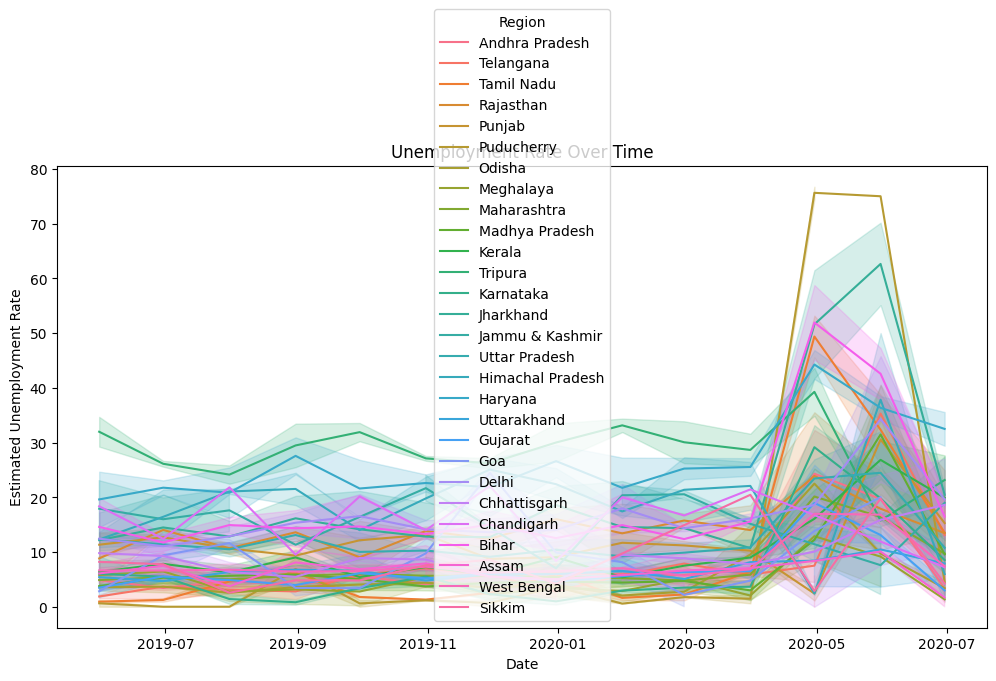

In [ ]:
# Plot unemployment rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date', y=' Estimated_Unemployment_Rate', hue='Region')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate')
plt.show()

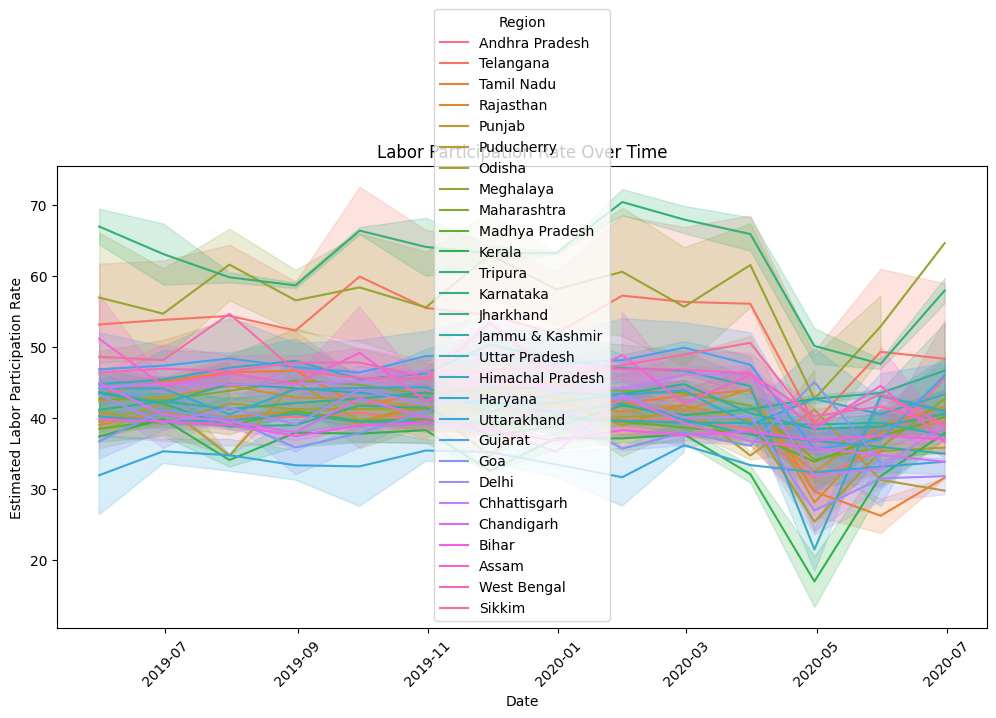

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date', y=' Estimated_Labour_Participation_Rate', hue='Region')
plt.title('Labor Participation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Labor Participation Rate')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate average unemployment rate by region
avg_unemployment_by_region = data.groupby('Region')[' Estimated_Unemployment_Rate'].mean()
avg_unemployment_by_region

Region
Andhra Pradesh       7.477143
Assam                6.428077
Bihar               18.918214
Chandigarh          15.991667
Chhattisgarh         9.240357
Delhi               16.495357
Goa                  9.274167
Gujarat              6.663929
Haryana             26.283214
Himachal Pradesh    18.540357
Jammu & Kashmir     16.188571
Jharkhand           20.585000
Karnataka            6.676071
Kerala              10.123929
Madhya Pradesh       7.406429
Maharashtra          7.557500
Meghalaya            4.798889
Odisha               5.657857
Puducherry          10.215000
Punjab              12.031071
Rajasthan           14.058214
Sikkim               7.249412
Tamil Nadu           9.284286
Telangana            7.737857
Tripura             28.350357
Uttar Pradesh       12.551429
Uttarakhand          6.582963
West Bengal          8.124643
Name:  Estimated_Unemployment_Rate, dtype: float64

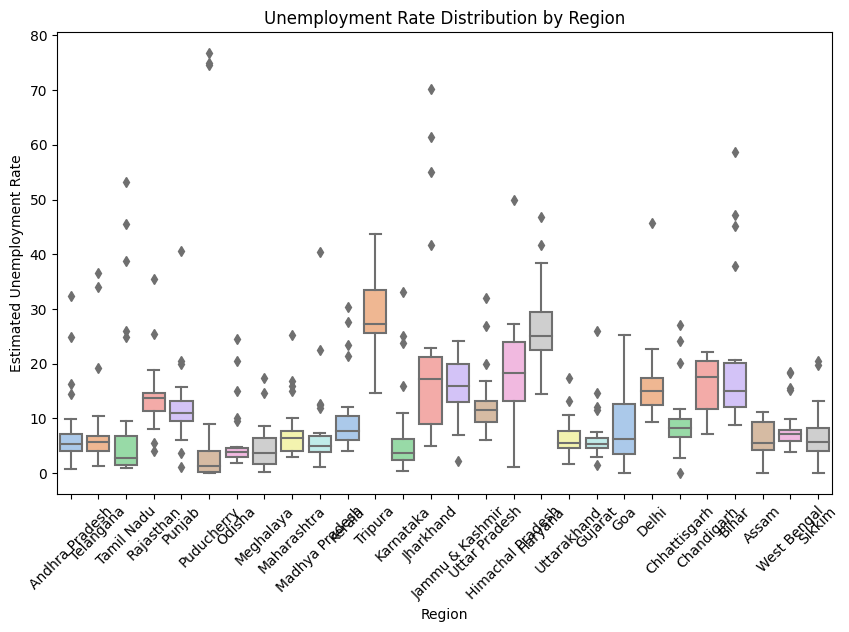

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Region', y=' Estimated_Unemployment_Rate', palette='pastel')
plt.title('Unemployment Rate Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate')
plt.xticks(rotation=45)
plt.show()


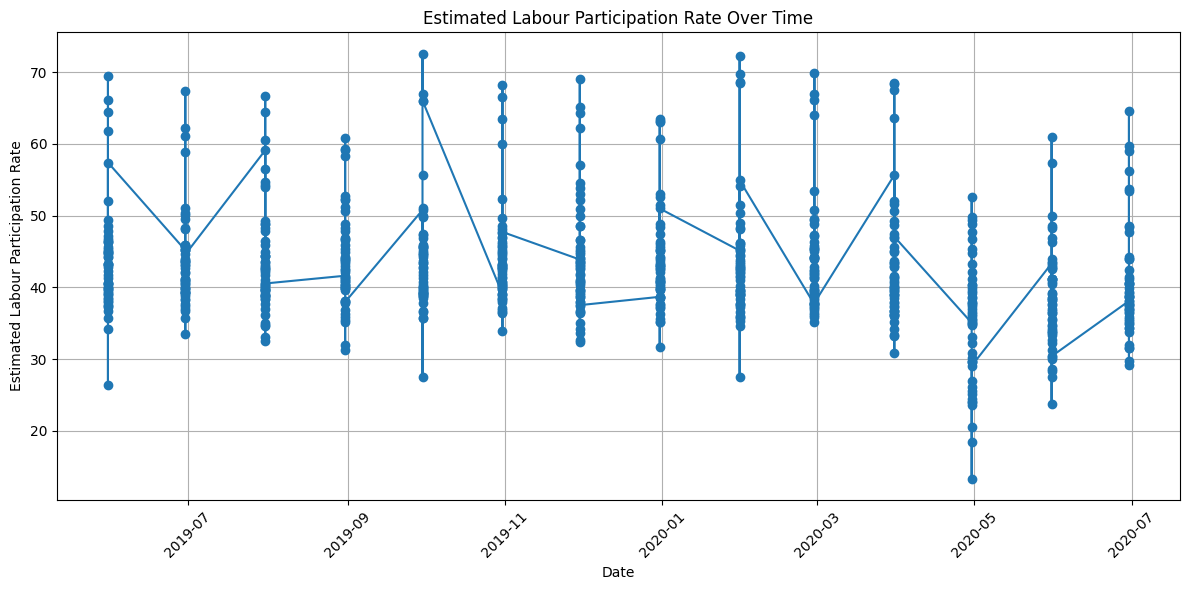

In [ ]:
# Create a line plot for Estimated_Labour_Participation_Rate over time
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data[' Estimated_Labour_Participation_Rate'], marker='o', linestyle='-')
plt.title('Estimated Labour Participation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Labour Participation Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-21-9f571c0bfd54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<Axes: >

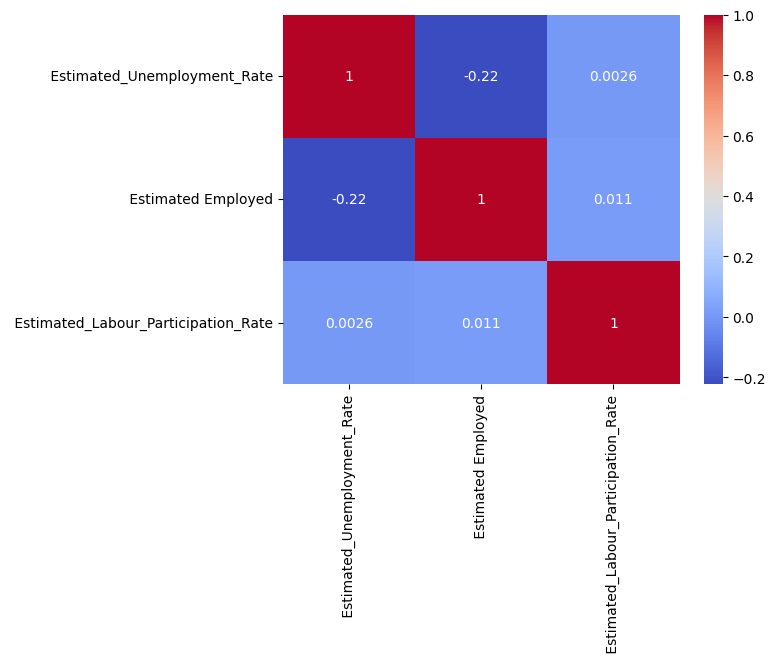

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


In [ ]:
data = data.drop_duplicates(subset=[' Frequency', 'Region'])


In [ ]:
pivot_table = data.pivot(index=' Frequency', columns='Region', values=' Estimated_Unemployment_Rate')

In [ ]:
pivot_table

Region,Andhra Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
Frequency,,,,,,,,,,,,,,,,,,,,,
Monthly,3.65,4.29,9.27,NaN,9.82,12.56,2.91,2.88,14.54,13.68,...,0.00,9.17,4.03,5.48,0.97,2.23,29.25,10.26,1.63,6.02
Monthly,6.09,7.87,19.90,18.35,9.77,12.31,2.75,4.09,24.67,10.88,...,1.25,13.49,13.62,8.20,0.89,1.52,34.69,14.40,9.17,7.25


<Axes: xlabel=' Frequency'>

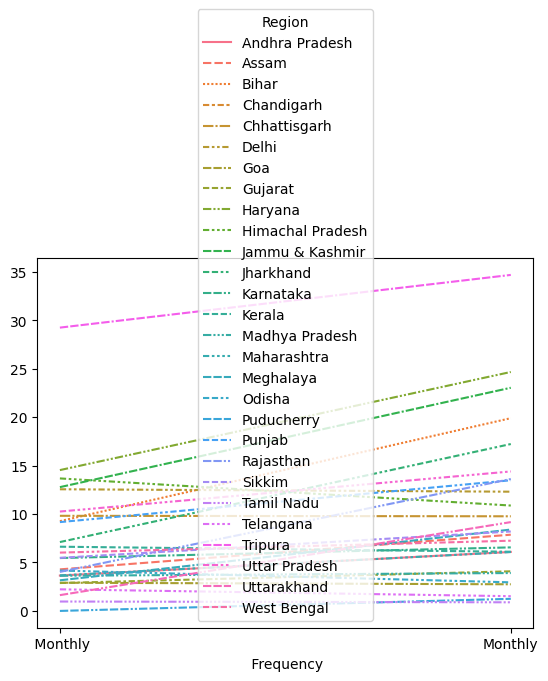

In [ ]:
sns.lineplot(data=pivot_table)